# TNM112 -- Lab 2

### Data generation
Look through the "data_generator.py" code to understand how the dataset is generated and plotted.

A dataset can be generated with a randomly selected subset of training images, and with a specified fraction used to formulate a validation set. Here, we use the MNIST dataset of handwritten digits.

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (54000, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)


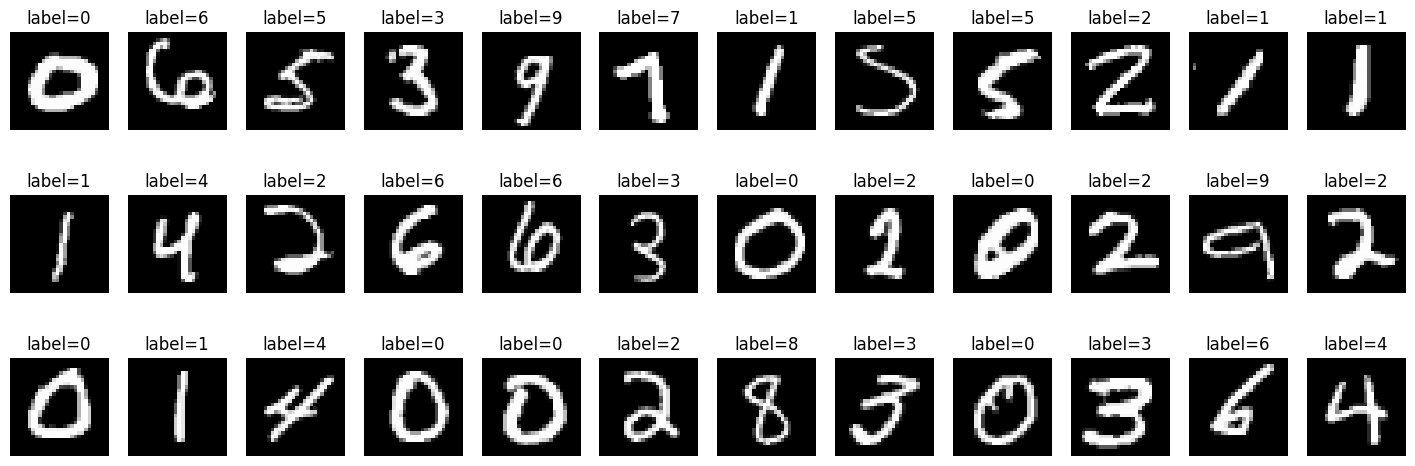

<Figure size 640x480 with 0 Axes>

In [10]:
import data_generator
#IDK but these two lines made it possible for me to import the dataset which i couldn't for some reasons before
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

data = data_generator.DataGenerator()
data.generate(dataset='mnist', N_valid=0.1)
data.plot()

### Keras CNN
A small CNN in Keras, trained with cross-entropy loss

We use the functions in 'util.py' to evaluate the model and plot the training progress.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,266 (16.66 KB)

 Trainable params: 4,266 (16.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6757 - loss: 1.1078 - val_accuracy: 0.9202 - val_loss: 0.2540
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9309 - loss: 0.2261 - val_accuracy: 0.9482 - val_loss: 0.1701
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9496 - loss: 0.1617 - val_accuracy: 0.9535 - val_loss: 0.1446
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9611 - loss: 0.1244 - val_accuracy: 0.9677 - val_loss: 0.1199
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9660 - loss: 0.1108 - val_accuracy: 0.9698 - val_loss: 0.1072
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9719 - loss: 0.0903 - val_accuracy: 0.9727 - val_loss: 0.0933
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9735 - loss: 0.0859 - val_accuracy: 0.9755 - val_loss: 0.0935
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9771 - loss: 0.0770 - val_accu

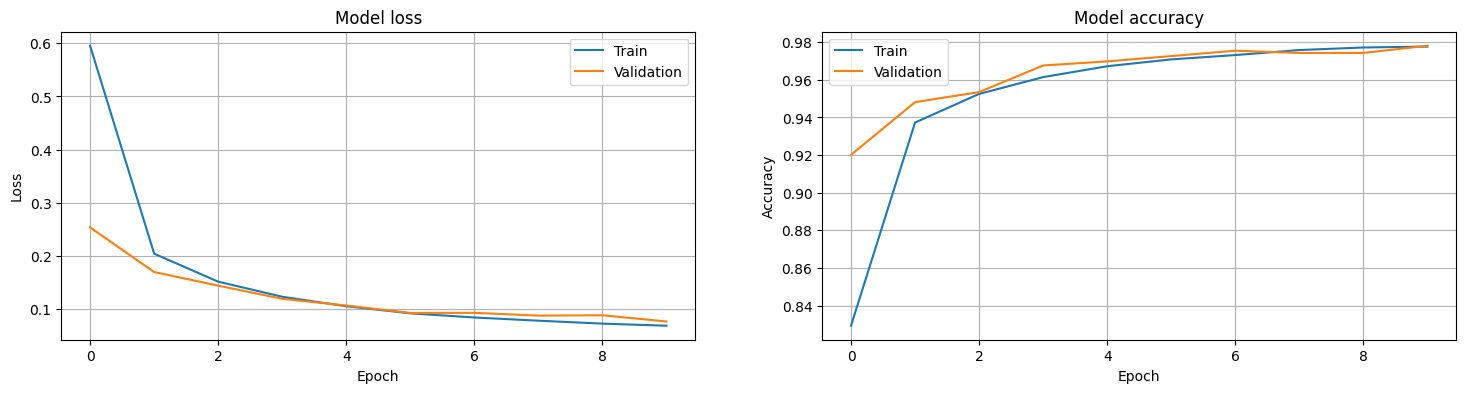

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import util

keras.backend.clear_session()

model = keras.Sequential()
model.add(layers.InputLayer(input_shape=data.x_train.shape[1:]))
model.add(layers.Conv2D(4, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(data.K, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
log = model.fit(data.x_train, data.y_train_oh, batch_size=128, epochs=10, 
                validation_data=(data.x_valid, data.y_valid_oh), verbose=True)

util.evaluate(model, data, final=True)
util.plot_training(log)

### Our CNN

#### Task 1
Implement the following functions in cnn.py: 'activation', 'conv2d_layer', 'pool2d_layer', 'flatten_layer', 'dense_layer', and 'evaluate'. Additionally, compute the number of weights in the model, in the function 'setup_model'.

For the 'activation' and 'dense_layer' functions you can use code that you wrote in Lab 1. For the 'evaluate' function you can use the code from Lab 1 for the accuracy. However, now we have trained with the cross-entropy loss, so you should evaluate this loss function through our CNN.

When you have finished the implementation, you should be able to run this code and get the same result as with the Keras model above. However, our code is not optimized, nor parallelized, so it will be rather slow to process the full dataset. In order to facilitate comparisons when you implement the functions, please have a look in the next cell below. 

In [4]:
import importlib
import cnn
importlib.reload(cnn)

# Get the weight matrices and biases of the trained Keras model
W, b, lname = util.get_weights(model)

# This is our implementation of a CNN, which we set to use the dataset we generated
cnn = cnn.CNN(data, verbose=True)

# Assign the weights and biases to the CNN and specify the activation function
cnn.setup_model(W, b, lname, activation='relu')

# Evaluate the model (accuracy on the training and test data)
cnn.evaluate()

#	Train loss:     0.0634
#	Train accuracy: 0.98
#	Test loss:      0.0746
#	Test accuracy:  0.98

Number of model weights:  4266
Model performance:
first:  (54000, 28, 28, 1)
sample 0 of 54000
sample 1000 of 54000
sample 2000 of 54000
sample 3000 of 54000
sample 4000 of 54000
sample 5000 of 54000
sample 6000 of 54000
sample 7000 of 54000
sample 8000 of 54000
sample 9000 of 54000
sample 10000 of 54000
sample 11000 of 54000
sample 12000 of 54000
sample 13000 of 54000
sample 14000 of 54000
sample 15000 of 54000
sample 16000 of 54000
sample 17000 of 54000
sample 18000 of 54000
sample 19000 of 54000
sample 20000 of 54000
sample 21000 of 54000
sample 22000 of 54000
sample 23000 of 54000
sample 24000 of 54000
sample 25000 of 54000
sample 26000 of 54000
sample 27000 of 54000
sample 28000 of 54000
sample 29000 of 54000
sample 30000 of 54000
sample 31000 of 54000
sample 32000 of 54000
sample 33000 of 54000
sample 34000 of 54000
sample 35000 of 54000
sample 36000 of 54000
sample 37000 of 54000
sample 38000 of 54000
sample 39000 of 54000
sample 40000 of 54000
sample 41000 of 54000
sample 42000

### Evaluation of our CNN layers

#### Task 1
As part of the implementation of the different layers in 'cnn.py', you can use the below code to compare the output of a randomly initialized Keras model and our CNN, for a single image. This is fast to compute, which will be convenient to check that your layers are correctly implemented.

In [6]:
import numpy as np
import cnn
import importlib

importlib.reload(cnn)

# Secify a test layer for comparison: 'conv', 'pool', 'flatten', or 'dense'
test_layer = 'conv'

keras.backend.clear_session()

# Keras model and input layer
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=data.x_train.shape[1:]))

# Test conv layer
#   - We apply normal initialization to the bias also,
#     otherwise it would be difficult to see the impact
#     of how you apply the bias (it is initialized to 0 by default)
if test_layer == 'conv':
    model.add(layers.Conv2D(4, kernel_size=(3, 3), 
                            activation='relu', padding='same',
                            bias_initializer='normal'))
    
    # You could also test to add a second convolutional layer, to check
    # that your network maps correctly from the output channels of the
    # previous layer, to the channels of this layer
    #model.add(layers.Conv2D(4, kernel_size=(3, 3), 
    #                        activation='relu', padding='same',
    #                        bias_initializer='normal'))

# Test pooling layer
elif test_layer == 'pool':
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Test flattening layer
elif test_layer == 'flatten':
    model.add(layers.Flatten())

# Test dense layer
#   - We need to first flatten the image input to apply a dense layer
#   - Make sure that your flatten layer works before testing the dense layer
elif test_layer == 'dense':
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax',
                           bias_initializer='normal'))

# Test data point (you could select any other image if you want)
x = data.x_train[0]

# Keras prediction. We need ta add an extra axis, 
# since the model can run over multiple datapoints. We 
# would need this in our model also if we use used the
# 'feedforward' function instead of the 'feedforward_sample'
y1 = model.predict(x[np.newaxis,:,:,:], verbose=False)

# Prediction with our network
W, b, lname = util.get_weights(model)  # Get the Keras model weights
cnn = cnn.CNN(data)
cnn.setup_model(W, b, lname, activation='relu') # Assign weights to our model
y2 = cnn.feedforward_sample(x) # Feedforward of one single sample

print('Evaluation of %s layer:'%test_layer)

# Check that the dimensionality is correct. The Keras
# model will have an extra first dimension due to the
# batch processing
print('\tShape of Keras output:  ', y1.shape)
print('\tShape of our output:    ', y2.shape)

# Print the absolute sum of output from the Keras
# model and our model. These should be the same if the
# implementation is correct
print('\tAbs sum of Keras model: ', np.sum(np.abs(y1)))
print('\tAbs sum of our model:   ', np.sum(np.abs(y2)))

# Print the absolute difference between the Keras
# model and our model. This should be very close
# to 0 if your implementation is correct. It could be
# a very minor difference due to numerical differences 
# (e.g., difference in precision used)
print('\tAbs difference:         ', np.sum(np.abs(y1-y2)))

Number of model weights:  40
Evaluation of conv layer:
	Shape of Keras output:   (1, 28, 28, 4)
	Shape of our output:     (28, 28, 4)
	Abs sum of Keras model:  1313.5103
	Abs sum of our model:    1313.510246699676
	Abs difference:          3.693997859954834e-05


### MNIST with limited training data
#### Task 2
In this experiment, we select a random subset from MNIST, with only 128 images. This is a very minimal dataset, but it is interesting to see how overfitting can be prevented with regularization strategies.

Your task is to expand the given network with different regularization strategies. You are free to choose which combination of strategies you want to use, for example augmentation layers, dropout, weight decay, batch normalization, etc. You can also expand the network with more layers, strided convolutions, or add skip-connections to facilitate optimization. Moreover, you can experiment with the number of training epochs and the batch size.

Also, note that now we have specified the Keras network in a sligthly different way. We explicitly formulate the input and output to the different layers. One motiviation for this is that it is easier if we want to, e.g., add skip-connections (checkout the layers.Add() layer in Keras).

During your development, you test the performance on the validation set (util.evaluate with the flag final=False). When you have found a good setup, run evaluation on the test set (final=True). Do this for at least 5 runs and report the average and the variance across models. Since the subset of 128 images is randomly selected and the optimization is stochastic, you will get slightly different values each time. Thus, averaging is important to get a robust indication of your model's performance. You can do this manually, or you can setup a for-loop to run a sequence of trainings, where you log the evaluation results for each model.

For the final results, you should aim at having an average accuracy of at least 90% (which is quite good considering that we are only training on 128 images).

Running step  1  of  5
Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (128, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE             │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,152,202 (4.40 MB)

 Trainable params: 1,150,922 (4.39 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.1030 - loss: 5.5735
Epoch 2/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4925 - loss: 1.5206
Epoch 3/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7158 - loss: 0.9464
Epoch 4/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8750 - loss: 0.5187
Epoch 5/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9524 - loss: 0.2505
Epoch 6/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9852 - loss: 0.1759
Epoch 7/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9802 - loss: 0.1228
Epoch 8/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0793
Epoch 9/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0723
Epoch 10/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 1.0000 - loss: 0.0738 - val_accuracy: 0.1143 - val_loss: 3.9005
Epoch 11/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0644
Epoch 12/110
8/8 ━━━━━━━━━━━━━━

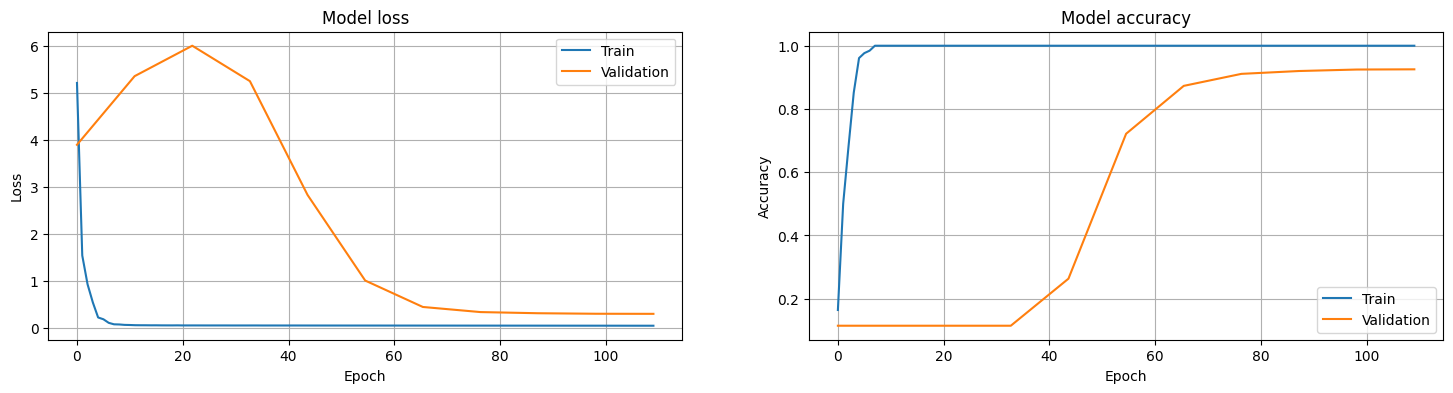

Model performance:
	Train loss:          0.0508
	Train accuracy:      100.00
	Test loss:           0.2806
	Test accuracy:       93.06
Running step  2  of  5
Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (128, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE             │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,152,202 (4.40 MB)

 Trainable params: 1,150,922 (4.39 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2992 - loss: 3.0700
Epoch 2/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5539 - loss: 1.4042
Epoch 3/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8144 - loss: 0.5890
Epoch 4/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9230 - loss: 0.2974
Epoch 5/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9947 - loss: 0.1173
Epoch 6/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9709 - loss: 0.1177
Epoch 7/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0820
Epoch 8/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0639
Epoch 9/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0667
Epoch 10/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 699ms/step - accuracy: 0.9947 - loss: 0.0651 - val_accuracy: 0.1092 - val_loss: 4.1379
Epoch 11/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0670
Epoch 12/110
8/8 ━━━━━━━━━━━━━━

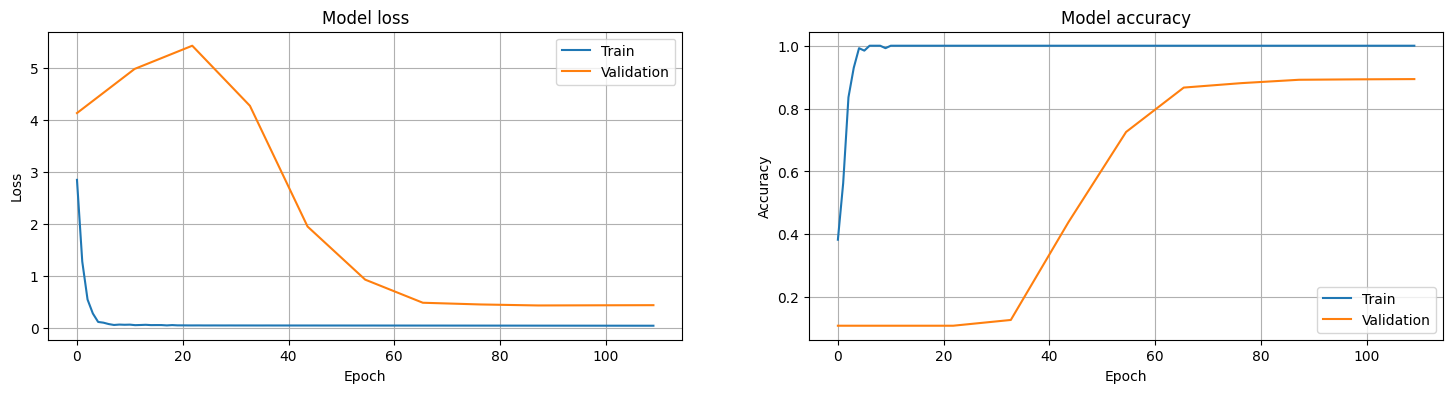

Model performance:
	Train loss:          0.0507
	Train accuracy:      100.00
	Test loss:           0.4066
	Test accuracy:       90.17
Running step  3  of  5
Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (128, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE             │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,152,202 (4.40 MB)

 Trainable params: 1,150,922 (4.39 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2008 - loss: 4.0173
Epoch 2/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4272 - loss: 1.7180
Epoch 3/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6913 - loss: 1.0013
Epoch 4/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9274 - loss: 0.4129
Epoch 5/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9402 - loss: 0.2505
Epoch 6/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9885 - loss: 0.1348
Epoch 7/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9930 - loss: 0.1159
Epoch 8/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0938
Epoch 9/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0722
Epoch 10/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 765ms/step - accuracy: 1.0000 - loss: 0.0628 - val_accuracy: 0.1158 - val_loss: 3.7684
Epoch 11/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0615
Epoch 12/110
8/8 ━━━━━━━━━━━━━━

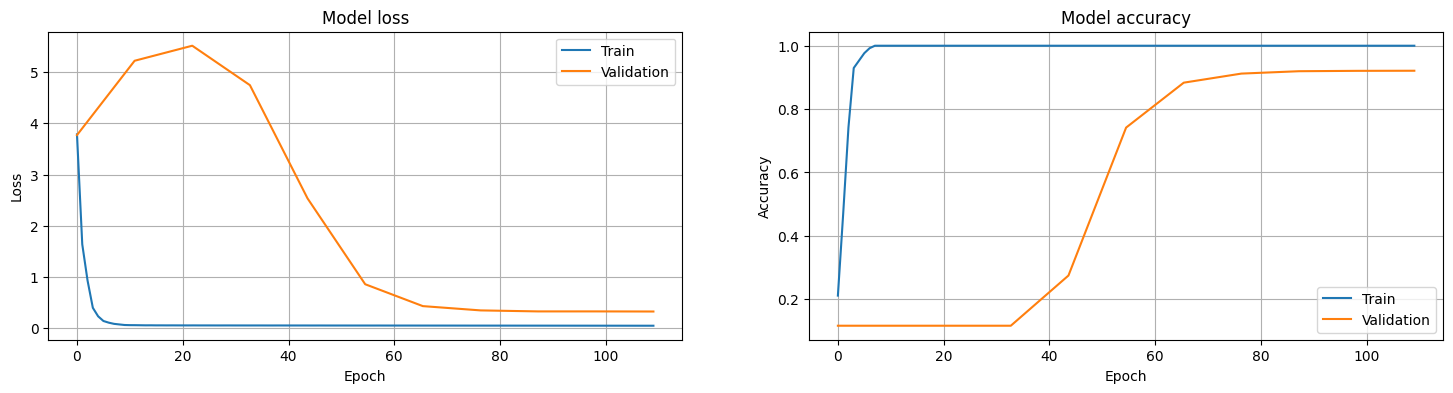

Model performance:
	Train loss:          0.0505
	Train accuracy:      100.00
	Test loss:           0.2974
	Test accuracy:       92.80
Running step  4  of  5
Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (128, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE             │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,152,202 (4.40 MB)

 Trainable params: 1,150,922 (4.39 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1095 - loss: 4.7414
Epoch 2/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4211 - loss: 2.3427
Epoch 3/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5743 - loss: 1.3800
Epoch 4/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8461 - loss: 0.5503
Epoch 5/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8161 - loss: 0.5338
Epoch 6/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9477 - loss: 0.2566
Epoch 7/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9903 - loss: 0.1475
Epoch 8/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9855 - loss: 0.1239
Epoch 9/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0951
Epoch 10/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step - accuracy: 1.0000 - loss: 0.0858 - val_accuracy: 0.1085 - val_loss: 3.6813
Epoch 11/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9930 - loss: 0.0758
Epoch 12/110
8/8 ━━━━━━━━━━━━━━

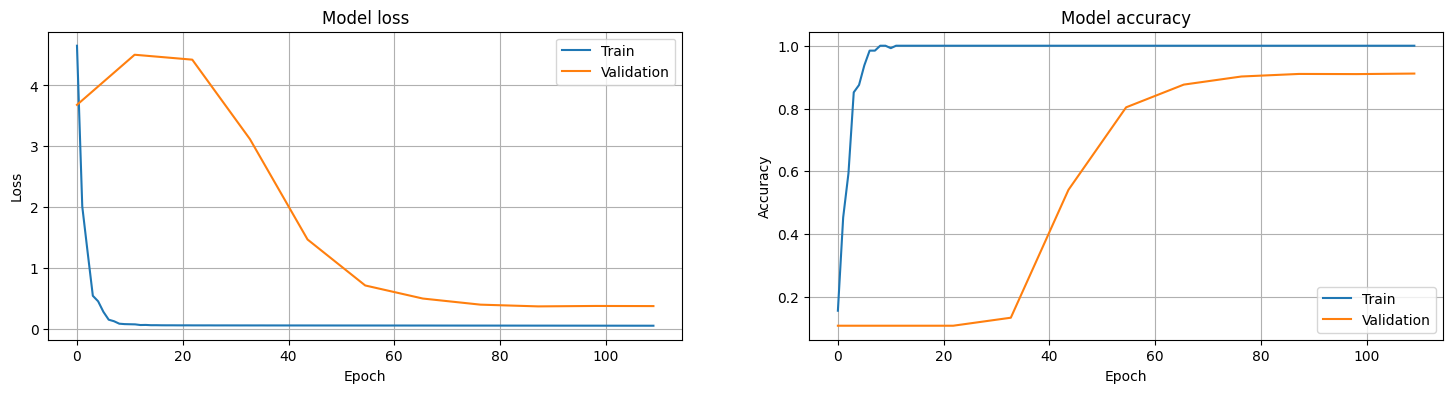

Model performance:
	Train loss:          0.0509
	Train accuracy:      100.00
	Test loss:           0.3567
	Test accuracy:       91.34
Running step  5  of  5
Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (128, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE             │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,152,202 (4.40 MB)

 Trainable params: 1,150,922 (4.39 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.1286 - loss: 5.3522
Epoch 2/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5205 - loss: 1.5279
Epoch 3/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7460 - loss: 0.8202
Epoch 4/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9125 - loss: 0.3878
Epoch 5/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9436 - loss: 0.2715
Epoch 6/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9617 - loss: 0.1780
Epoch 7/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.1176
Epoch 8/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9947 - loss: 0.1059
Epoch 9/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0818
Epoch 10/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 738ms/step - accuracy: 1.0000 - loss: 0.0691 - val_accuracy: 0.1098 - val_loss: 3.0392
Epoch 11/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0629
Epoch 12/110
8/8 ━━━━━━━━━━━━━━

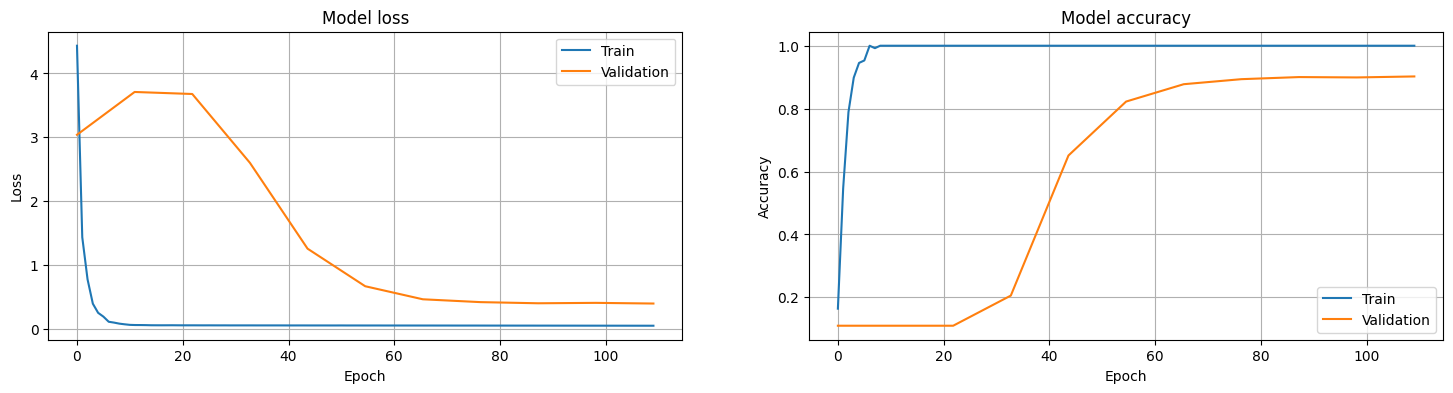

Model performance:
	Train loss:          0.0506
	Train accuracy:      100.00
	Test loss:           0.3509
	Test accuracy:       90.84
Avarage performance over  5  evaluations:  0.9164199948310852


In [11]:
#2nd verision better
# A block of convolutional layers followed by max pooling
from IPython.display import clear_output
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import util

def conv_block(x, N, channels, kernel_size, activation, padding='same'):
    for i in range(N):
        x = layers.Conv2D(channels, kernel_size=kernel_size, activation=None, padding=padding, kernel_regularizer=keras.regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    return layers.MaxPooling2D(pool_size=(2, 2))(x)
    
epochs = 110
batch_size = 16

# For setting up averaging over multiple training runs
K = 5
acc = np.zeros((K,2))
for k in range(K):
    print("Running step ", k+1, " of ", K)
    # MNIST with 128 randomly selected training images
    data = data_generator.DataGenerator()
    data.generate(dataset='mnist', N_train=128)

    keras.backend.clear_session()

    x      = layers.Input(shape=data.x_train.shape[1:])

    #Augmentation
    x = layers.RandomRotation(factor=0.05)(x)  # Randomly rotate images by up to 10%
    x = layers.RandomTranslation(height_factor=0.05, width_factor=0.05)(x)  # Shift images by up to 10% height and width
    x = layers.RandomBrightness(factor=0.1)(x)  # Adjust brightness randomly within the range [-20%, +20%]

    #conv/dropout/norm
    conv1  = conv_block(x, N=2, channels=64, kernel_size=(3,3), activation='relu', padding='same')

    conv2  = conv_block(conv1, N=2, channels=128, kernel_size=(3,3), activation='relu', padding='same')
    dropout1 = layers.Dropout(0.1)(conv2)

    conv3  = conv_block(dropout1, N=2, channels=128, kernel_size=(3,3), activation='relu', padding='same')
    dropout2 = layers.Dropout(0.1)(conv3)

    #Flat
    flat1  = layers.Flatten()(dropout2)

    dense1 = layers.Dense(512, activation='relu')(flat1)
    dropout3 = layers.Dropout(0.1)(dense1)

    y = layers.Dense(data.K, activation='softmax')(dropout3)

    model = keras.models.Model(inputs=x, outputs=y)
    model.summary()

    opt = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    log = model.fit(data.x_train, data.y_train_oh, batch_size=batch_size, epochs=epochs, 
                    validation_data=(data.x_valid, data.y_valid_oh), validation_freq=10,  # We don't need to evaluate at each epoch
                    verbose=True)

    #util.evaluate(model, data, final=False)
    util.plot_training(log)

    # When you are finished with hyper-parameter tuning, you should evaluate
    # your model on the test set, and average over 5 trainings. If you want
    # to do this automatically, you can setup a foor loop and store each evaluation
    acc[k,:] = util.evaluate(model, data, final=True)
    #clear_output(wait=True)

print("Avarage performance over ",len(acc[:,1]) ," evaluations: ", np.mean(acc[:,1]))

#Avarage performance over  5  evaluations:  0.9153999924659729

In [ ]:
#original copy 1
# A block of convolutional layers followed by max pooling
from IPython.display import clear_output
import numpy as np

def conv_block(x, N, channels, kernel_size, activation, padding='same'):
    for i in range(N):
        x = layers.Conv2D(channels, kernel_size=kernel_size, activation=activation, padding=padding, kernel_regularizer=keras.regularizers.l2(1e-4))(x)
    return layers.MaxPooling2D(pool_size=(2, 2))(x)
    
epochs = 100
batch_size = 16

# For setting up averaging over multiple training runs
K = 1
acc = np.zeros((K,2))
for k in range(K):
    print("Running step ", k+1, " of ", K)
    # MNIST with 128 randomly selected training images
    data = data_generator.DataGenerator()
    data.generate(dataset='mnist', N_train=128)

    keras.backend.clear_session()

    x      = layers.Input(shape=data.x_train.shape[1:])

    #conv/dropout/norm
    conv1  = conv_block(x, N=2, channels=32, kernel_size=(3,3), activation='relu', padding='same')
    norm1 = layers.BatchNormalization()(conv1)
    dropout1 = layers.Dropout(0.1)(norm1) #0.3
    conv2  = conv_block(dropout1, N=3, channels=64, kernel_size=(3,3), activation='relu', padding='same')
    norm2 = layers.BatchNormalization()(conv2)
    dropout2 = layers.Dropout(0.2)(norm2) #0.4
    #conv3  = conv_block(dropout2, N=2, channels=32, kernel_size=(3,3), activation='relu', padding='same')
    #norm3 = layers.BatchNormalization()(conv3)
    #dropout3 = layers.Dropout(0.0)(norm3) #0.5

    #print(dropout3.shape)


    #Flat
    flat1  = layers.Flatten()(dropout2)

    dense1 = layers.Dense(256, activation='relu')(flat1)
    dropout3 = layers.Dropout(0)(dense1) #0.4
   # dense2 = layers.Dense(64, activation='relu')(dropout3)
    #dropout4 = layers.Dropout(0.0)(dense2) #0.3

    y = layers.Dense(data.K, activation='softmax')(dropout3)

    model = keras.models.Model(inputs=x, outputs=y)
    model.summary()

    opt = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    log = model.fit(data.x_train, data.y_train_oh, batch_size=batch_size, epochs=epochs, 
                    validation_data=(data.x_valid, data.y_valid_oh), validation_freq=10,  # We don't need to evaluate at each epoch
                    verbose=True)

    util.evaluate(model, data, final=False)
    util.plot_training(log)

    # When you are finished with hyper-parameter tuning, you should evaluate
    # your model on the test set, and average over 5 trainings. If you want
    # to do this automatically, you can setup a foor loop and store each evaluation
    acc[k,:] = util.evaluate(model, data, final=True)
    #clear_output(wait=True)

print("Avarage performance over ",len(acc[:,1]) ," evaluations: ", np.mean(acc[:,1]))

# Avarage performance over  5  evaluations:  0.8737199902534485

### Tumor classification in digital pathology
#### Task 3
In this task, we will look at a more difficult task, using the PatchCamelyon dataset. This contains tissue samples from breast lymph nodes, which could either be healthy or contain tumor tissue, i.e. this is a binary classification problem. For this reason, it is valuable to also evaluate the AU-ROC, which can be passed to Keras as an evaluation metric, 'AUC'.

You are provided with the training and validation set. These have been cropped to 32x32 pixels, to make it a bit less resource demanding to train. The test set is also provided, but without labels.

Your task is to setup a Keras model to achieve the best possible performance on the validation set. You are free to choose how to do this, e.g., by means of regularization and network specifications. You can, for example, use your results from Task 2 as a starting point, but you should also think around how this problem differs from the MNIST classification. For example, in this case the orientation of images has no meaning, so you can randomly flip images both horizontally and vertically. You can also, e.g., explore augmentation by means of changing the image contrast and brightness.

When you are finished with your development, you should run the 'util.pred_test' (at the bottom of the cell), to produce a CSV file with predictions of the test set. The exported CSV file should be uploaded to the Kaggle challenge, as described in the lab information. You need to train the model and export a CSV file 5 times, in order to have a good estimate for your model's performance. There are no requirements on how well your model should perform, as long as it is well above random guessing (50% accuracy).

In [ ]:
# Original
from tensorflow import keras
from tensorflow.keras import layers
import util
import data_generator
from tensorflow import keras
import util


def conv_block(x, N, channels, kernel_size, activation=None, padding='same'):
    for i in range(N):
        x = layers.Conv2D(channels, kernel_size=kernel_size, activation=None, padding=padding, kernel_regularizer=keras.regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    return layers.MaxPooling2D(pool_size=(2, 2))(x)

    
epochs = 3
batch_size = 16

# Load the PatchCamyleon dataset
# In this dataset, we don't have labels for the test set.
# Do your development by monitoring the validation performance,
# and when you are finished you will run predictions on the test
# set and produce a CSV file that you can upload to Kaggle.
data = data_generator.DataGenerator()
data.generate(dataset='patchcam')
data.plot()

keras.backend.clear_session()

#Input
x = layers.Input(shape=data.x_train.shape[1:])

#Augmentation
x = layers.RandomRotation(factor=0.1)(x)
x = layers.RandomTranslation(height_factor=0.05, width_factor=0.05)(x) 
x = layers.RandomContrast(factor=0.1)(x)
x = layers.RandomFlip(mode="horizontal_and_vertical")(x)

#Convolutions
#conv1 = conv_block(x, N=2, channels=64, kernel_size=(3,3), padding="same")
#conv2 = conv_block(conv1, N=2, channels=128, kernel_size=(3,3), padding="same")
#conv3 = conv_block(conv2, N=2, channels=128, kernel_size=(3,3), padding="same")
#dropout1 = layers.Dropout(0.1)(conv3) 

conv1 = conv_block(x, N=2, channels=100, kernel_size=(3,3), padding='same')
conv2 = conv_block(conv1, N=2, channels=150, kernel_size=(3,3), padding='same')
#conv3 = conv_block(conv2, N=2, channels=200, kernel_size=(3,3), padding='same') #TA BORT DENNA DÅ?
dropout1 = layers.Dropout(0.1)(conv2)


# Make sure the dimensions match for skip connection
conv2_shortcut = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(conv2)  # Adjusting for both spatial and channel match

# Skip connection
#added = layers.Add()([dropout1, conv2_shortcut])  # Adding the shortcut
#skipped_connection = layers.ReLU()(added)

#Flatten
flat1  = layers.Flatten()(dropout1)
dropout2 = layers.Dropout(0.1)(flat1)

#Dense layer
dense1 = layers.Dense(256, activation='relu')(dropout2)


y = layers.Dense(data.K, activation='softmax')(dense1)

model = keras.models.Model(inputs=x, outputs=y)
model.summary()

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','AUC'])
#log = model.fit(data.x_train, data.y_train_oh, batch_size=batch_size, epochs=epochs, 
                #validation_data=(data.x_valid, data.y_valid_oh), validation_freq=2,
                #verbose=True)
log = model.fit(data.x_train[:1000], data.y_train_oh[:1000], 
                batch_size=batch_size, 
                epochs=epochs, 
                validation_data=(data.x_valid[:5000], data.y_valid_oh[:5000]), 
                validation_freq=3, 
                verbose=True)

util.evaluate(model, data)
util.plot_training(log)

# TODO: When you have finished your model development, you should 
# run inference on the test set and export a CSV file that can be 
# uploaded to Kaggle
#util.pred_test(model, data, name='your_submission.csv')

Data specification:
	Dataset type:           patchcam
	Number of classes:      2
	Number of channels:     3
	Training data shape:    (100000, 32, 32, 3)
	Validation data shape:  (32768, 32, 32, 3)
	Test data shape:        (32768, 32, 32, 3)


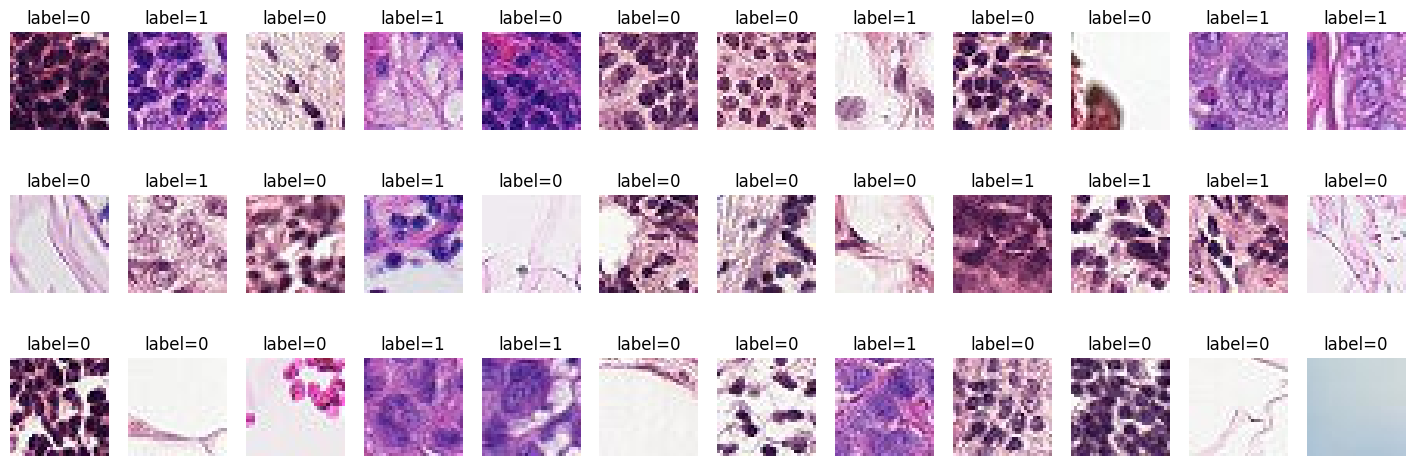

<Figure size 640x480 with 0 Axes>

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_4CLONE             │ (None, 32, 32, 3)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 180)      │       162,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 180)      │           720 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 180)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 180)      │       291,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 180)      │           720 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 180)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,192,352 (4.55 MB)

 Trainable params: 1,191,032 (4.54 MB)

 Non-trainable params: 1,320 (5.16 KB)

Epoch 1/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - AUC: 0.7593 - accuracy: 0.7114 - loss: 1.3163 - learning_rate: 0.0010
Epoch 2/14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: AUC,accuracy,loss
  current = self.get_monitor_value(logs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: AUC,accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - AUC: 0.8596 - accuracy: 0.7878 - loss: 0.5234 - learning_rate: 0.0010
Epoch 3/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - AUC: 0.8629 - accuracy: 0.7871 - loss: 0.5163 - val_AUC: 0.8558 - val_accuracy: 0.7798 - val_loss: 0.5336 - learning_rate: 0.0010
Epoch 4/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - AUC: 0.8811 - accuracy: 0.8058 - loss: 0.4845 - learning_rate: 0.0010
Epoch 5/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - AUC: 0.8817 - accuracy: 0.8066 - loss: 0.4817 - learning_rate: 0.0010
Epoch 6/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - AUC: 0.8905 - accuracy: 0.8156 - loss: 0.4646 - val_AUC: 0.8438 - val_accuracy: 0.7628 - val_loss: 0.5374 - learning_rate: 0.0010
Epoch 7/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - AUC: 0.8970 - accuracy: 0.8195 - loss: 0.4520 - learning_rate: 0.0010
Epoch 8/14
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - AUC: 0.8941 - accuracy: 0.8178 - loss: 0.4557 - learning_rate: 0.0010
Epoch 9

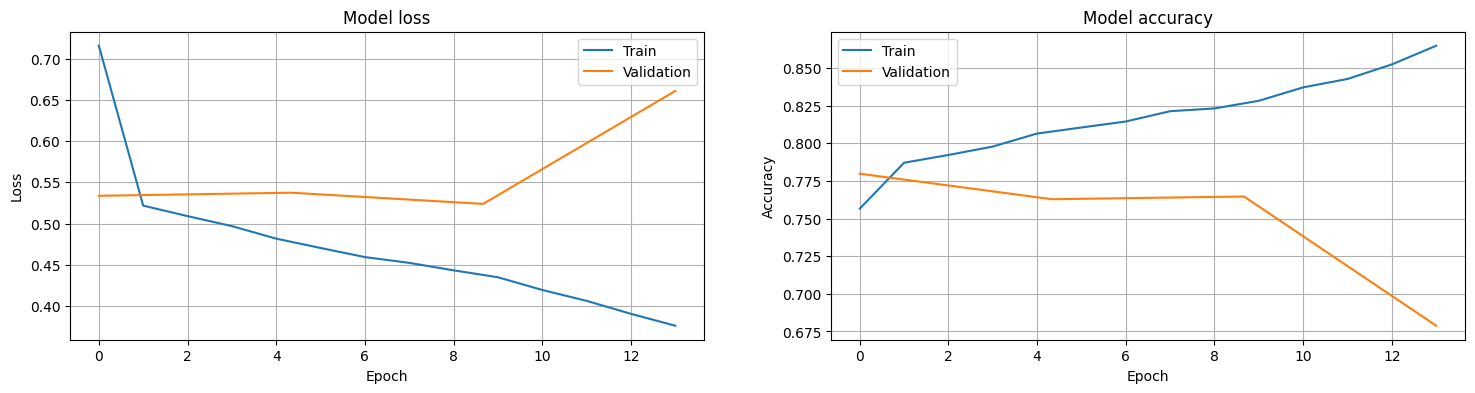

In [2]:
#Better verision i guess
from tensorflow import keras
from tensorflow.keras import layers
import util
import data_generator
from tensorflow import keras
import util
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def conv_block(x, N, channels, kernel_size, activation, padding='same'):
    for i in range(N):
        x = layers.Conv2D(channels, kernel_size=kernel_size, activation=None, padding=padding, kernel_regularizer=keras.regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    return layers.MaxPooling2D(pool_size=(2, 2))(x)


epochs = 14
batch_size = 64

# Load the PatchCamyleon dataset
# In this dataset, we don't have labels for the test set.
# Do your development by monitoring the validation performance,
# and when you are finished you will run predictions on the test
# set and produce a CSV file that you can upload to Kaggle.
data = data_generator.DataGenerator()
data.generate(dataset='patchcam')
data.plot()

keras.backend.clear_session()

#Input
x = layers.Input(shape=data.x_train.shape[1:])

#Augmentation
x = layers.RandomRotation(factor=0.6)(x)  # Randomly rotate images by up to 5%
x = layers.RandomTranslation(height_factor=0.15, width_factor=0.15)(x)  # Shift images by up to 10% height and width
x = layers.RandomBrightness(factor=0.25)(x)  # Adjust brightness randomly within the range [-10%, +10%]
x = layers.RandomFlip(mode="horizontal_and_vertical")(x)

#conv
conv1  = conv_block(x, N=2, channels=50, kernel_size=(3,3), activation='relu', padding='same')

conv2  = conv_block(conv1, N=2, channels=100, kernel_size=(3,3), activation='relu', padding='same')

conv3  = conv_block(conv2, N=2, channels=180, kernel_size=(3,3), activation='relu', padding='same')

#Flat
flat1  = layers.Flatten()(conv3)

dense1 = layers.Dense(200, activation='relu')(flat1)
dense2 = layers.Dense(100, activation='relu')(dense1)

dropout = layers.Dropout(0.25)(dense2)  # Add dropout here as well



y = layers.Dense(data.K, activation='softmax')(dense1)

model = keras.models.Model(inputs=x, outputs=y)
model.summary()

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','AUC'])
#log = model.fit(data.x_train, data.y_train_oh, batch_size=batch_size, epochs=epochs,
                #validation_data=(data.x_valid, data.y_valid_oh), validation_freq=2,
                #verbose=True)
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Training
log = model.fit(data.x_train[:12000], data.y_train_oh[:12000],
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(data.x_valid[:20000], data.y_valid_oh[:20000]),
                validation_freq=3,
                verbose=True,
                callbacks=[early_stopping, reduce_lr])

util.evaluate(model, data)
util.plot_training(log)

# TODO: When you have finished your model development, you should
# run inference on the test set and export a CSV file that can be
# uploaded to Kaggle
#util.pred_test(model, data, name='your_submission.csv')

Data specification:
	Dataset type:           patchcam
	Number of classes:      2
	Number of channels:     3
	Training data shape:    (100000, 32, 32, 3)
	Validation data shape:  (32768, 32, 32, 3)
	Test data shape:        (32768, 32, 32, 3)


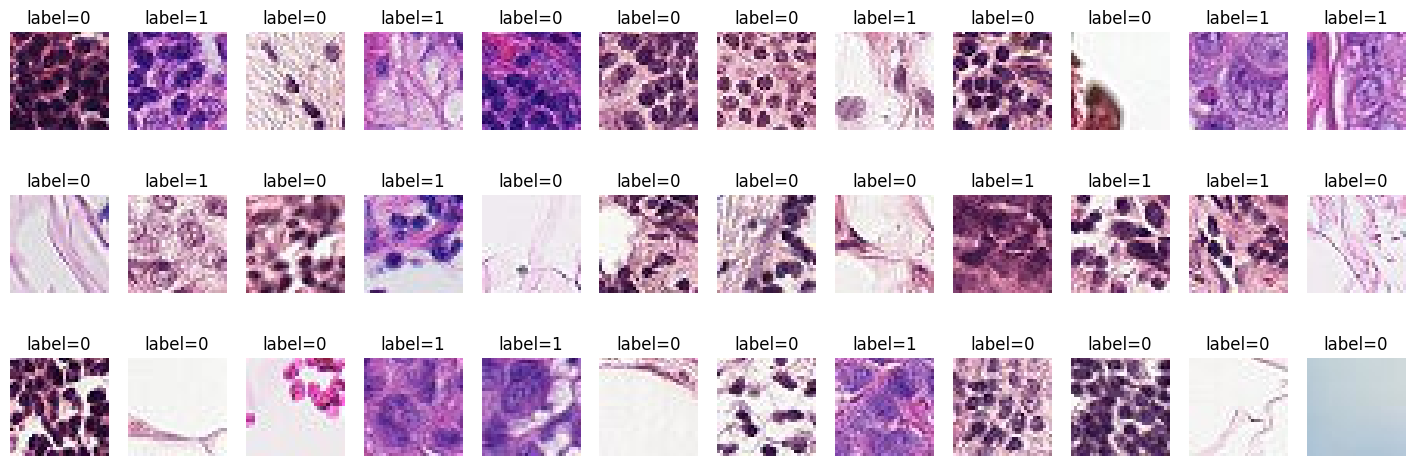

<Figure size 640x480 with 0 Axes>

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_4CLONE             │ (None, 32, 32, 3)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,467,778 (5.60 MB)

 Trainable params: 1,465,730 (5.59 MB)

 Non-trainable params: 2,048 (8.00 KB)

(32768, 32, 32, 3)
Epoch 1/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - AUC: 0.8338 - accuracy: 0.7640 - loss: 0.5886 - learning_rate: 0.0010
Epoch 2/22
  1/715 ━━━━━━━━━━━━━━━━━━━━ 1:43 145ms/step - AUC: 0.8806 - accuracy: 0.8714 - loss: 0.5104

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: AUC,accuracy,loss
  current = self.get_monitor_value(logs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: AUC,accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


715/715 ━━━━━━━━━━━━━━━━━━━━ 67s 94ms/step - AUC: 0.8736 - accuracy: 0.7967 - loss: 0.4912 - learning_rate: 0.0010
Epoch 3/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 80s 112ms/step - AUC: 0.8795 - accuracy: 0.8073 - loss: 0.4656 - val_AUC: 0.8743 - val_accuracy: 0.7950 - val_loss: 0.4719 - learning_rate: 0.0010
Epoch 4/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - AUC: 0.8847 - accuracy: 0.8081 - loss: 0.4552 - learning_rate: 0.0010
Epoch 5/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - AUC: 0.8914 - accuracy: 0.8172 - loss: 0.4457 - learning_rate: 0.0010
Epoch 6/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 78s 109ms/step - AUC: 0.8964 - accuracy: 0.8185 - loss: 0.4407 - val_AUC: 0.8521 - val_accuracy: 0.7692 - val_loss: 0.5484 - learning_rate: 0.0010
Epoch 7/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 68s 96ms/step - AUC: 0.8981 - accuracy: 0.8247 - loss: 0.4409 - learning_rate: 0.0010
Epoch 8/22
715/715 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - AUC: 0.9037 - accuracy: 0.8288 - loss: 0.4322 - learning_rate: 0.0010
Epoch 9

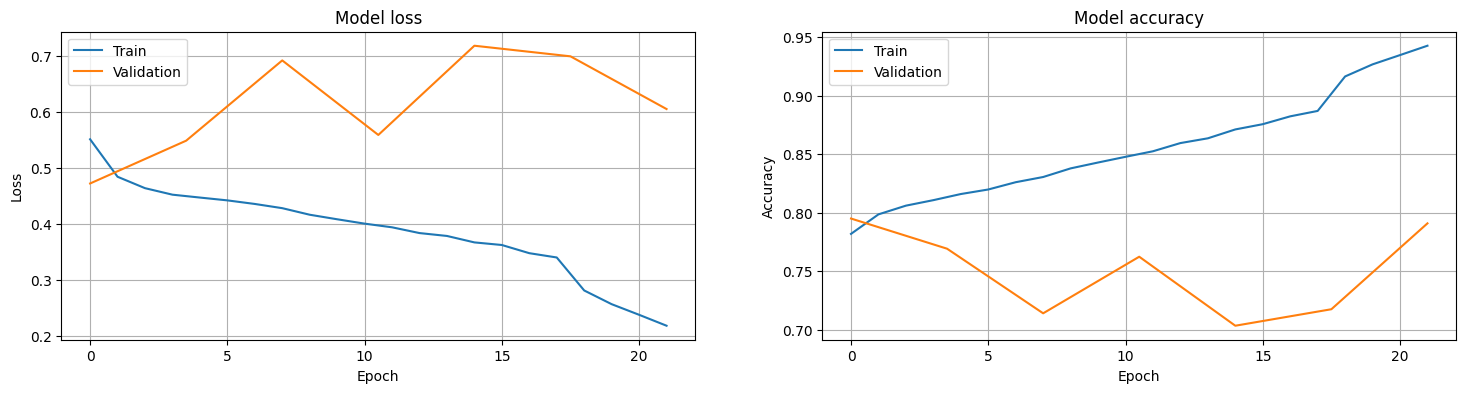

In [12]:
#FRÅN COLAB AND SHOULD BE OK I GUESS
#continue testing
from tensorflow import keras
from tensorflow.keras import layers
import util
import data_generator
from tensorflow import keras
import util
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def conv_block(x, N, channels, kernel_size, activation, padding='same'):
    for i in range(N):
        x = layers.Conv2D(channels, kernel_size=kernel_size, activation=None, padding=padding, kernel_regularizer=keras.regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    return layers.MaxPooling2D(pool_size=(2, 2))(x)


epochs = 22
batch_size = 70

# Load the PatchCamyleon dataset
# In this dataset, we don't have labels for the test set.
# Do your development by monitoring the validation performance,
# and when you are finished you will run predictions on the test
# set and produce a CSV file that you can upload to Kaggle.
data = data_generator.DataGenerator()
data.generate(dataset='patchcam')
data.plot()

keras.backend.clear_session()

#Input
x = layers.Input(shape=data.x_train.shape[1:])

#Augmentation ___________________________________________________---------------------_KOLLA DESSA
x = layers.RandomRotation(factor=0.4)(x)  # test 0.7
x = layers.RandomTranslation(height_factor=0.1, width_factor=0.1)(x)  # Testa 0.2
x = layers.RandomBrightness(factor=0.15)(x)  # 0.2 tror jag var bättre
x = layers.RandomFlip(mode="horizontal_and_vertical")(x)

#conv
conv1  = conv_block(x, N=2, channels=128, kernel_size=(3,3), activation='relu', padding='same')

conv2  = conv_block(conv1, N=2, channels=128, kernel_size=(3,3), activation='relu', padding='same')

conv3  = conv_block(conv2, N=2, channels=256, kernel_size=(3,3), activation='relu', padding='same')

#Flat
#flat1  = layers.Flatten()(conv3)
flat1 = layers.Flatten()(conv3)

dropout1 = layers.Dropout(0.3)(flat1)  # Add dropout here as well
dense1 = layers.Dense(256, activation='relu')(dropout1)
dropout2 = layers.Dropout(0.3)(dense1)  # add this and test
dense2 = layers.Dense(256, activation='relu')(dropout2)


y = layers.Dense(data.K, activation='softmax')(dense2)

model = keras.models.Model(inputs=x, outputs=y)
model.summary()

opt = keras.optimizers.AdamW()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','AUC'])
#log = model.fit(data.x_train, data.y_train_oh, batch_size=batch_size, epochs=epochs,
                #validation_data=(data.x_valid, data.y_valid_oh), validation_freq=2,
                #verbose=True)
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Training
print(data.x_valid.shape)
log = model.fit(data.x_train[:50000], data.y_train_oh[:50000],
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(data.x_valid[:25000], data.y_valid_oh[:25000]),
                validation_freq=3,
                verbose=True,
                callbacks=[early_stopping, reduce_lr])


util.evaluate(model, data)
util.plot_training(log)

# TODO: When you have finished your model development, you should
# run inference on the test set and export a CSV file that can be
# uploaded to Kaggle
#util.pred_test(model, data, name='your_submission.csv')

Data specification:
	Dataset type:           patchcam
	Number of classes:      2
	Number of channels:     3
	Training data shape:    (100000, 32, 32, 3)
	Validation data shape:  (32768, 32, 32, 3)
	Test data shape:        (32768, 32, 32, 3)


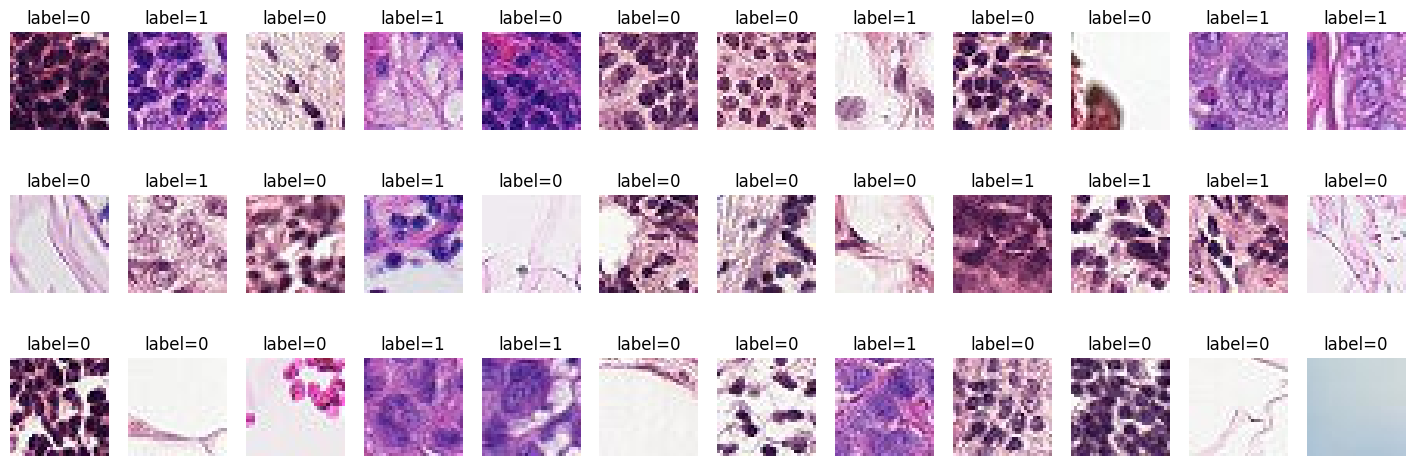

<Figure size 640x480 with 0 Axes>

channels 128 kernal size (3, 3)
channels 128 kernal size (3, 3)
channels 128 kernal size (3, 3)
channels 128 kernal size (3, 3)
channels 256 kernal size (3, 3)
channels 256 kernal size (3, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_4CLONE             │ (None, 32, 32, 3)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,450,818 (9.35 MB)

 Trainable params: 2,448,770 (9.34 MB)

 Non-trainable params: 2,048 (8.00 KB)

(32768, 32, 32, 3)
Epoch 1/24


KeyboardInterrupt: 

In [5]:
#KÖR DENNA OCH KOLLA, den verkar bra, och sedan kanske med hela datasettet
from tensorflow import keras
from tensorflow.keras import layers
import util
import data_generator
from tensorflow import keras
import util
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def conv_block(x, N, channels, kernel_size, activation, padding='same'):
    for i in range(N):
        x = layers.Conv2D(channels, kernel_size=kernel_size, activation=None, padding=padding, kernel_regularizer=keras.regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    return layers.MaxPooling2D(pool_size=(2, 2))(x)


epochs = 24
batch_size = 70

# Load the PatchCamyleon dataset
# In this dataset, we don't have labels for the test set.
# Do your development by monitoring the validation performance,
# and when you are finished you will run predictions on the test
# set and produce a CSV file that you can upload to Kaggle.
data = data_generator.DataGenerator()
data.generate(dataset='patchcam')
data.plot()

keras.backend.clear_session()

#Input
x = layers.Input(shape=data.x_train.shape[1:])

x = layers.RandomRotation(factor=0.4)(x)  # test 0.7
x = layers.RandomTranslation(height_factor=0.1, width_factor=0.1)(x)  # Testa 0.2
x = layers.RandomBrightness(factor=0.15)(x)  # 0.2 tror jag var bättre
x = layers.RandomFlip(mode="horizontal_and_vertical")(x)

#conv
conv1  = conv_block(x, N=2, channels=128, kernel_size=(3,3), activation='relu', padding='same')

conv2  = conv_block(conv1, N=2, channels=128, kernel_size=(3,3), activation='relu', padding='same')

conv3  = conv_block(conv2, N=2, channels=256, kernel_size=(3,3), activation='relu', padding='same')

#Flat
#flat1  = layers.Flatten()(conv3)
flat1 = layers.Flatten()(conv3)

dropout1 = layers.Dropout(0.3)(flat1)  # Add dropout here as well
dense1 = layers.Dense(256, activation='relu')(dropout1)
dropout2 = layers.Dropout(0.3)(dense1)  # add this and test
dense2 = layers.Dense(256, activation='relu')(dropout2)


y = layers.Dense(data.K, activation='softmax')(dense2)

model = keras.models.Model(inputs=x, outputs=y)
model.summary()

opt = keras.optimizers.AdamW()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','AUC'])
#log = model.fit(data.x_train, data.y_train_oh, batch_size=batch_size, epochs=epochs,
                #validation_data=(data.x_valid, data.y_valid_oh), validation_freq=2,
                #verbose=True)
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Training
print(data.x_valid.shape)
log = model.fit(data.x_train, data.y_train_oh,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(data.x_valid, data.y_valid_oh),
                validation_freq=3,
                verbose=True,
                callbacks=[early_stopping, reduce_lr])


util.evaluate(model, data)
util.plot_training(log)

# TODO: When you have finished your model development, you should
# run inference on the test set and export a CSV file that can be
# uploaded to Kaggle
util.pred_test(model, data, name='your_submission.csv')